In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [44]:
df=pd.read_csv("Pos_Salaries.csv")

In [45]:
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [46]:
real_x=df.iloc[:,1:2].values
real_y=df.iloc[:,2].values

In [47]:
lin=LinearRegression()
lin.fit(real_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
poly=PolynomialFeatures(degree=3)
poly_x=poly.fit_transform(real_x)
poly_x


array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [100]:
poly.fit(poly_x,real_y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

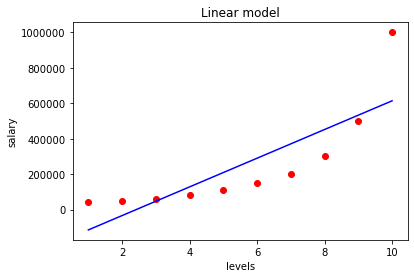

In [101]:
plt.scatter(real_x,real_y,color="red")
plt.plot(real_x,lin.predict(real_x),color="blue")
plt.title("Linear model")
plt.xlabel("levels")
plt.ylabel("salary")
plt.show()

In [102]:
lin2=LinearRegression()
lin2.fit(poly_x,real_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

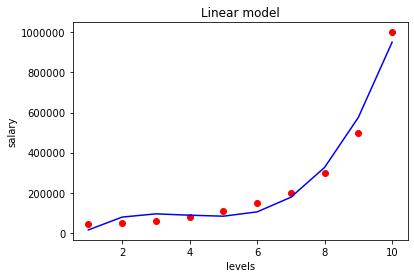

In [103]:
plt.scatter(real_x,real_y,color="red")
plt.plot(real_x,lin2.predict(poly_x),color="blue")
plt.title("Linear model")
plt.xlabel("levels")
plt.ylabel("salary")
plt.show()

In [104]:
pred_poly_y=lin2.predict(poly_x)

In [115]:
score=r2_score(real_y,pred_poly_y)

In [116]:
score

0.9812097727913367

In [117]:
score1=r2_score(real_y,lin.predict(real_x))

In [118]:
score1

0.6690412331929895